**Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Carga de Datos**

In [2]:

df = pd.read_csv("C:/Users/eserrano/Desktop/Maestria/Analitica_Predictiva/dataset2.csv")
df.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


**Analisis Exploratorio**

In [3]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (2864056, 33)
Nombre columnas: Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')


In [6]:
##Columnas, nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864056 entries, 0 to 2864055
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   activityID                 object 
 1   heart_rate                 float64
 2   hand temperature (°C)      float64
 3   hand acceleration X ±16g   float64
 4   hand acceleration Y ±16g   float64
 5   hand acceleration Z ±16g   float64
 6   hand gyroscope X           float64
 7   hand gyroscope Y           float64
 8   hand gyroscope Z           float64
 9   hand magnetometer X        float64
 10  hand magnetometer Y        float64
 11  hand magnetometer Z        float64
 12  chest temperature (°C)     float64
 13  chest acceleration X ±16g  float64
 14  chest acceleration Y ±16g  float64
 15  chest acceleration Z ±16g  float64
 16  chest gyroscope X          float64
 17  chest gyroscope Y          float64
 18  chest gyroscope Z          float64
 19  chest magnetometer X       float64
 20  ch

In [5]:
## descripción estadística de los datos numéricos
df.describe()

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
count,2.864010e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,...,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06
mean,1.097703e+02,3.267050e+01,-4.978788e+00,3.575225e+00,3.174904e+00,-3.881062e-03,3.213164e-02,-6.985945e-03,2.125344e+01,-1.432121e+01,...,9.547292e+00,-1.251156e-01,-2.459224e+00,8.153172e-03,-3.430653e-02,6.899129e-03,-3.272317e+01,1.635810e+00,1.691927e+01,4.487160e+00
std,2.583130e+01,1.800771e+00,5.989589e+00,6.260608e+00,3.828842e+00,1.298024e+00,8.842820e-01,1.453340e+00,2.402693e+01,2.409430e+01,...,5.674253e+00,6.816935e+00,3.523211e+00,1.070971e+00,5.953280e-01,1.842663e+00,1.888977e+01,2.159774e+01,2.031745e+01,2.357792e+00
min,5.700000e+01,2.743750e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.780440e+01,-2.221270e+01,-1.669970e+01,-1.039410e+02,-2.000430e+02,...,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,1.000000e+00
25%,9.000000e+01,3.143750e+01,-9.038570e+00,1.294029e+00,9.735957e-01,-3.477418e-01,-1.970635e-01,-3.028935e-01,5.345607e+00,-2.951722e+01,...,9.030297e+00,-1.756760e+00,-3.643863e+00,-1.528980e-01,-8.216113e-02,-3.097942e-01,-4.290010e+01,-1.140080e+01,3.293130e+00,2.000000e+00
50%,1.080000e+02,3.312500e+01,-5.818260e+00,3.568640e+00,2.961145e+00,-6.158165e-03,6.137100e-03,-5.385480e-03,2.428385e+01,-1.645440e+01,...,9.573050e+00,-2.717770e-01,-2.357330e+00,4.215460e-03,-4.229060e-03,-2.273390e-03,-3.389515e+01,1.419830e+00,1.816660e+01,5.000000e+00
75%,1.250000e+02,3.400000e+01,-8.020333e-01,6.588192e+00,5.996195e+00,3.030542e-01,2.366580e-01,2.924292e-01,3.925000e+01,1.765928e+00,...,1.000520e+01,1.253742e+00,-1.062060e+00,9.399325e-02,8.283495e-02,6.281400e-02,-1.905550e+01,1.734970e+01,3.091070e+01,7.000000e+00
max,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.569490e+02,2.641580e+01,1.698350e+01,1.433840e+01,1.725900e+02,1.211760e+02,...,1.572320e+02,1.572930e+02,1.588720e+02,1.742040e+01,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,8.000000e+00


C:\Users\eserrano\AppData\Local\Temp\ipykernel_24992\2040795475.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.set_index('heart_rate').corr()


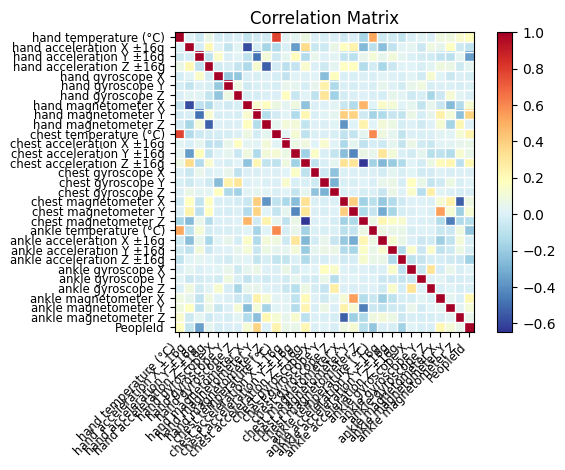

In [7]:
## Matriz de Correlación

corr = df.set_index('heart_rate').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()